In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import pandas as pd
def read_log(path):
    rows = []
    for line in open(path).readlines():
        rows.append(json.loads(line.strip()))
    return pd.DataFrame(rows)

0      8.968515
1      5.955036
2      6.243465
3      9.836969
4      9.165455
5      7.731613
6      6.682028
7      6.256554
8      5.961393
9      5.633031
10     5.433090
11     5.178203
12     6.392079
13    11.090342
14    11.090359
15    11.090369
16    11.090376
17    11.090381
18    11.090382
Name: train_loss, dtype: float64


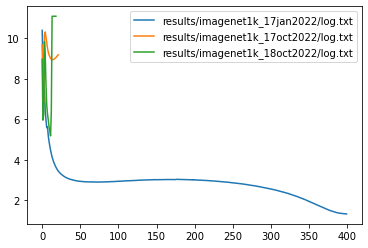

In [5]:
paths = [
    #"results/imagenet1k_24apr2022/log.txt",
    #"results/imagenet1k_25apr2022/log.txt",
    #"results/imagenet1k_26apr2022/log.txt",
    # "results/imagenet1k_27apr2022/log.txt",
    #"results/imagenet1k_28apr2022/log.txt",
    #"results/imagenet21k_29apr2022/log.txt",
    #"results/official_vitb8/log.txt",
    #"results/imagenet1k_18jun2022/log.txt",
    #"results/imagenet1k_13jul2022/log.txt",
    #"results/imagenet1k_14jul2022/log.txt",
    #"results/imagenet1k_15jul2022/log.txt",
    #"results/imagenet1k_16jul2022/log.txt",
    #"results/imagenet1k_17jul2022/log.txt",
    # "results/imagenet1k_18jul2022/log.txt",
    #"results/imagenet21k_18jun2022/log.txt",
    #"results/imagenet1k_19jun2022/log.txt",
    #"results/imagenet1k_19jun2022/log.txt",
    #"results/imagenet1k_18feb2022/log.txt",
    #"results/official_vits16/log.txt"
    #"results/laion_13apr2022/log.txt"
    #"results/imagenet1k_07nov2021/log.txt",
    #"results/official_vitb16/log.txt",
    #"results/laion_02jun2022/log.txt",
    #"results/imagenet1k_08oct2022/log.txt",
    #"results/imagenet1k_09oct2022/log.txt",
    #"results/imagenet1k_10oct2022/log.txt",
    #"results/imagenet1k_11oct2022/log.txt",
    #"results/imagenet1k_15oct2022/log.txt",
    "results/imagenet1k_17jan2022/log.txt",
    #"results/imagenet1k_16oct2022/log.txt",
    "results/imagenet1k_17oct2022/log.txt",
    "results/imagenet1k_18oct2022/log.txt",

]
for path in paths:
    df= read_log(path)
    plt.plot(df.epoch, df.train_loss, label=path)
plt.legend()
print(df.train_loss)

In [4]:
%%time
from glob import glob
import torch
import os
rows = []
#for model in glob("results/imagenet1k_29apr2022/checkpoint.pth"):
for model in glob("results/**/checkpoint.pth"):
    """
    try:
        ckpt = torch.load(model, map_location="cpu")
    except Exception:
        continue
    """
    ckpt = None   
    row = {}
    row["path"] = model

    if ckpt and "args" in ckpt:
        args = ckpt["args"]
        row["arch"] = args.arch + "_" + str(args.patch_size)
        
    for evaluation in glob(os.path.join(os.path.dirname(model), "eval*", "log.txt")):
        ev = read_log(evaluation)
        if len(ev):
            final = ev.iloc[0].to_dict() if 'eval_fast' in evaluation else ev.iloc[-1].to_dict()
            ds = os.path.basename(os.path.dirname(evaluation))
            for k, v in final.items():
                if "acc" in k:
                    if type(v) == list and len(v) == 1:
                        v = v[0]
                    row[ds+"_"+k] = v
        
    rows.append(row)
df = pd.DataFrame(rows)
df.to_csv("results.csv", index=False)

CPU times: user 717 ms, sys: 221 ms, total: 938 ms
Wall time: 5.01 s


In [17]:
#m = "eval_fast_linear_cifar10_accuracy"
#m = "eval_linear_flowers_test_acc1"
#m = "eval_linear_cifar10_test_acc1"
#m = "eval_linear_flowers_test_acc1"
m = "eval_linear_imagenet1k_test_acc1"
#m = "eval_linear_cars_test_acc1"

d = df[["path", m]]
#df.sort_values(by="eval_linear_imagenet1k_test_acc1", ascending=False)
#df = df.sort_values(by="eval_fast_linear_cifar10_accuracy", ascending=False)
d = d.sort_values(by=m, ascending=False)
d

,path,eval_linear_imagenet1k_test_acc1
9,results/imagenet21k_18jun2022/checkpoint.pth,80.142
32,results/official_vitb8/checkpoint.pth,79.824
12,results/official_vits8/checkpoint.pth,79.588
48,results/imagenet1k_18feb2022/checkpoint.pth,79.360
38,results/imagenet1k_19jun2022/checkpoint.pth,78.970
7,results/imagenet1k_18jun2022/checkpoint.pth,78.714
2,results/imagenet21k_19feb2022/checkpoint.pth,78.702
16,results/official_vitb16/checkpoint.pth,77.842
8,results/imagenet1k_17jan2022/checkpoint.pth,77.642
41,results/imagenet1k_07nov2021/checkpoint.pth,77.184


In [6]:
cols = ["eval_linear_cifar10_test_acc1", "eval_linear_cifar100_test_acc1", "eval_linear_flowers_test_acc1", "eval_linear_cars_test_acc1", "eval_linear_imagenet1k_test_acc1"]
df[df.path=="results/imagenet21k_19feb2022/checkpoint.pth"].dropna(axis=1).filter(axis=1, regex="acc1")[cols].round(2)

,eval_linear_cifar10_test_acc1,eval_linear_cifar100_test_acc1,eval_linear_flowers_test_acc1,eval_linear_cars_test_acc1,eval_linear_imagenet1k_test_acc1
2,98.06,92.9,99.61,47.8,78.7
